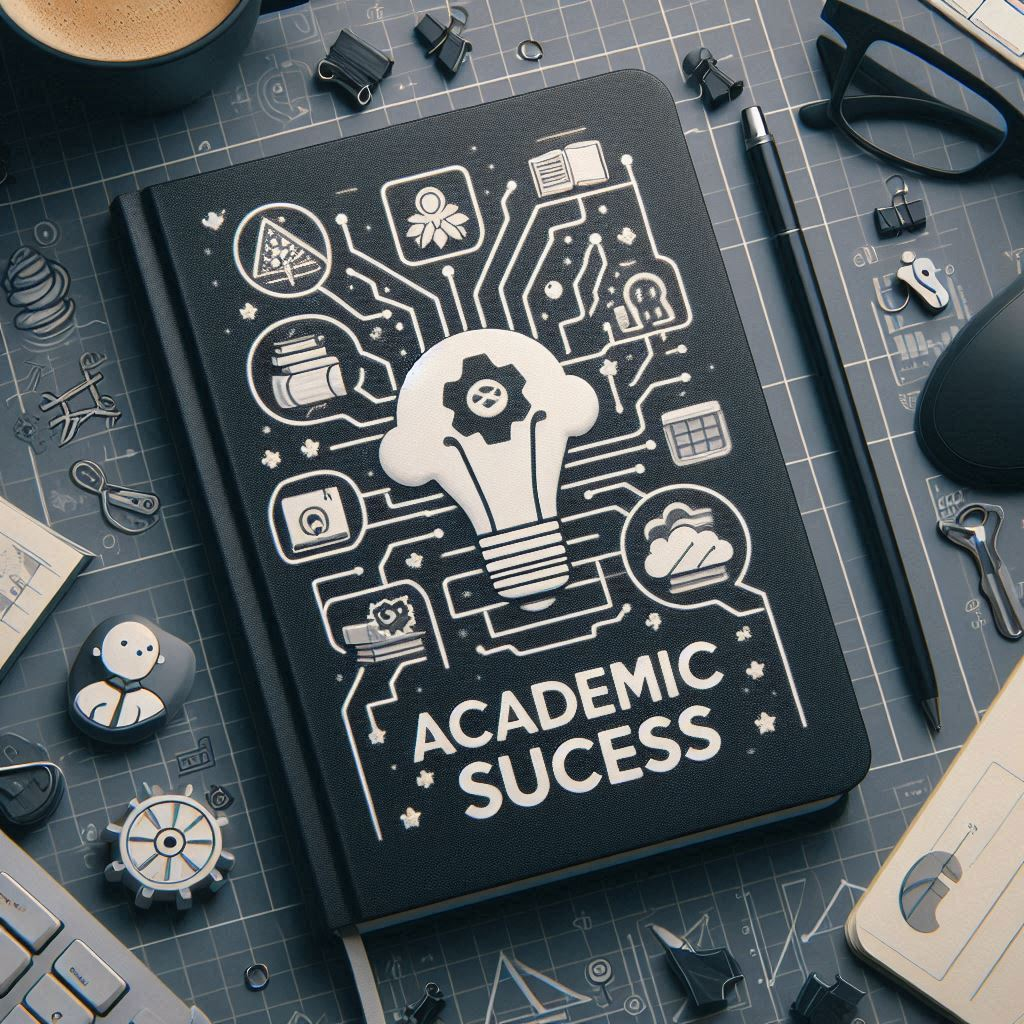

# Academic Achievement Dataset Description

This dataset from Kaggle includes various features related to student academic achievement along with one target variable. Here's a breakdown of each column:

- **id**: Unique identifier for each student.
- **Marital status**: Marital status of the student (e.g., single or married).
- **Application mode**: Mode of application (e.g., online or written).
- **Application order**: Order of application.
- **Course**: Course enrolled by the student.
- **Daytime/evening attendance**: Attendance mode (daytime or evening).
- **Previous qualification**: Previous educational qualification.
- **Previous qualification (grade)**: Grade of the previous qualification.
- **Nationality**: Nationality of the student.
- **Mother's qualification**: Educational qualification of the student's mother.
- **Father's qualification**: Educational qualification of the student's father.
- **Mother's occupation**: Occupation of the student's mother.
- **Father's occupation**: Occupation of the student's father.
- **Admission grade**: Grade achieved during admission.
- **Displaced**: Whether the student is displaced or not.
- **Educational special needs**: Whether the student has special educational needs or not.
- **Debtor**: Whether the student has debts or not.
- **Tuition fees up to date**: Whether the student's tuition fees are up to date or not.
- **Gender**: Gender of the student.
- **Scholarship holder**: Whether the student holds a scholarship or not.
- **Age at enrollment**: Age of the student at enrollment.
- **International**: Whether the student is international or not.
- **Curricular units 1st sem (credited)**: Number of credited curricular units in the first semester.
- **Curricular units 1st sem (enrolled)**: Number of enrolled curricular units in the first semester.
- **Curricular units 1st sem (evaluations)**: Number of evaluations in the first semester.
- **Curricular units 1st sem (approved)**: Number of approved curricular units in the first semester.
- **Curricular units 1st sem (grade)**: Average grade of curricular units in the first semester.
- **Curricular units 1st sem (without evaluations)**: Number of curricular units completed without evaluations in the first semester.
- **Curricular units 2nd sem (credited)**: Number of credited curricular units in the second semester.
- **Curricular units 2nd sem (enrolled)**: Number of enrolled curricular units in the second semester.
- **Curricular units 2nd sem (evaluations)**: Number of evaluations in the second semester.
- **Curricular units 2nd sem (approved)**: Number of approved curricular units in the second semester.
- **Curricular units 2nd sem (grade)**: Average grade of curricular units in the second semester.
- **Curricular units 2nd sem (without evaluations)**: Number of curricular units completed without evaluations in the second semester.
- **Unemployment rate**: Unemployment rate.
- **Inflation rate**: Inflation rate.
- **GDP**: Gross Domestic Product (GDP).
- **Target**: Target variable indicating student achievement status

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px



from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


# Grafikleri göstermek için
%matplotlib inline
#%matplotlib notebook
plt.rcParams['figure.figsize'] = 10, 6

# Makine öğrenmesi algoritmaları, veri ön işleme ve değerlendirme için sklearn kütüphanesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc
from  xgboost import XGBClassifier
# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Load and Understand Data Sets

Link to the competition from which the datasets were obtained: " https://www.kaggle.com/competitions/playground-series-s4e6"

In [2]:
# Load data
df = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")

In [ ]:
df.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [ ]:
test.head(2)

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                               0.0   
1                                    6                              13.5   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  

[2 rows x 37 columns]

In [ ]:
sample.head(2)

id    Target
0  76518  Graduate
1  76519  Graduate

In [ ]:
print(df.shape)
print(test.shape)

(76518, 38)

(51012, 37)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 76518 entries, 0 to 76517

Data columns (total 38 columns):

 #   Column                                          Non-Null Count  Dtype  

---  ------                                          --------------  -----  

 0   id                                              76518 non-null  int64  

 1   Marital status                                  76518 non-null  int64  

 2   Application mode                                76518 non-null  int64  

 3   Application order                               76518 non-null  int64  

 4   Course                                          76518 non-null  int64  

 5   Daytime/evening attendance                      76518 non-null  int64  

 6   Previous qualification                          76518 non-null  int64  

 7   Previous qualification (grade)                  76518 non-null  float64

 8   Nacionality                                     76518 non-null  int64  

 9   Mother's qualification   

# EDA (Exploratory Data Analysis)

In [ ]:
df.describe().T

count          mean  \
id                                              76518.0  38258.500000   
Marital status                                  76518.0      1.111934   
Application mode                                76518.0     16.054419   
Application order                               76518.0      1.644410   
Course                                          76518.0   9001.286377   
Daytime/evening attendance                      76518.0      0.915314   
Previous qualification                          76518.0      3.658760   
Previous qualification (grade)                  76518.0    132.378766   
Nacionality                                     76518.0      1.226600   
Mother's qualification                          76518.0     19.837633   
Father's qualification                          76518.0     23.425076   
Mother's occupation                             76518.0      8.583196   
Father's occupation                             76518.0      8.882172   
Admission grade                                 76518.0    125.363971   
Displaced                                       76518.0      0.569265   
Educational special needs                       76518.0      0.003738   
Debtor                                          76518.0      0.071382   
Tuition fees up to date                         76518.0      0.893646   
Gender                                          76518.0      0.315821   
Scholarship holder                              76518.0      0.247393   
Age at enrollment                               76518.0     22.278653   
International                                   76518.0      0.006626   
Curricular units 1st sem (credited)             76518.0      0.188871   
Curricular units 1st sem (enrolled)             76518.0      5.891516   
Curricular units 1st sem (evaluations)          76518.0      7.352362   
Curricular units 1st sem (approved)             76518.0      4.178520   
Curricular units 1st sem (grade)                76518.0      9.995862   
Curricular units 1st sem (without evaluations)  76518.0      0.057960   
Curricular units 2nd sem (credited)             76518.0      0.137053   
Curricular units 2nd sem (enrolled)             76518.0      5.933414   
Curricular units 2nd sem (evaluations)          76518.0      7.234468   
Curricular units 2nd sem (approved)             76518.0      4.007201   
Curricular units 2nd sem (grade)                76518.0      9.626085   
Curricular units 2nd sem (without evaluations)  76518.0      0.062443   
Unemployment rate                               76518.0     11.520340   
Inflation rate                                  76518.0      1.228218   
GDP                                             76518.0     -0.080921   

                                                         std    min  \
id                                              22088.988286   0.00   
Marital status                                      0.441669   1.00   
Application mode                                   16.682337   1.00   
Application order                                   1.229645   0.00   
Course                                           1803.438531  33.00   
Daytime/evening attendance                          0.278416   0.00   
Previous qualification                              8.623774   1.00   
Previous qualification (grade)                     10.995328  95.00   
Nacionality                                         3.392183   1.00   
Mother's qualification                             15.399456   1.00   
Father's qualification                             14.921164   1.00   
Mother's occupation                                17.471591   0.00   
Father's occupation                                16.803940   0.00   
Admission grade                                    12.562328  95.00   
Displaced                                           0.495182   0.00   
Educational special needs                           0.061023   0.00   
Debtor                                              0.257463   0.00 

In [ ]:
df.describe(include = "O").T

count unique       top   freq
Target  76518      3  Graduate  36282

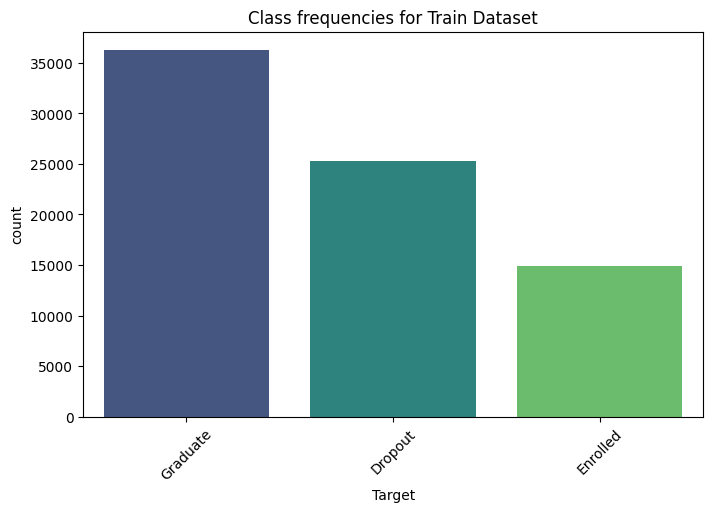

In [ ]:
# Lets also observe the target class frequencies
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Target"], palette='viridis')
plt.title('Class frequencies for Train Dataset')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check Data for isnull
print("Train Dataset:")
print("******")
print(df.isnull().sum())
print("**************************************")
print("Test Dataset:")
print("******")
print(test.isnull().sum())

Train Dataset:

******

id                                                0

Marital status                                    0

Application mode                                  0

Application order                                 0

Course                                            0

Daytime/evening attendance                        0

Previous qualification                            0

Previous qualification (grade)                    0

Nacionality                                       0

Mother's qualification                            0

Father's qualification                            0

Mother's occupation                               0

Father's occupation                               0

Admission grade                                   0

Displaced                                         0

Educational special needs                         0

Debtor                                            0

Tuition fees up to date                           0

Gender                

In [ ]:
print("Train Dataset:")
print(df.duplicated().sum())
print("**************************************")
print("Test Dataset:")
print(test.duplicated().sum())

Train Dataset:

0

**************************************

Test Dataset:

0


### Outlier Treshold

In [4]:
def outlier_tresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return {
        'Column': col_name,
        'Q1': quartile1,
        'Q3': quartile3,
        'IQR': interquantile_range,
        'Lower Limit': low_limit,
        'Upper Limit': up_limit
    }

def check_outliers(dataframe, col_names):
    outliers_list = []
    for col in col_names:
        thresholds = outlier_tresholds(dataframe, col)
        outliers = dataframe[(dataframe[col] < thresholds['Lower Limit']) | (dataframe[col] > thresholds['Upper Limit'])]
        outliers_dict = {
            'Column': col,
            'Outlier Count': outliers.shape[0],
            'Outliers': outliers[col].tolist()
        }
        outliers_list.append(outliers_dict)
    return outliers_list


col_names = df.drop(["Target"], axis =1).columns
outliers = check_outliers(df, col_names)


for outlier in outliers:
    print(f"Column: {outlier['Column']}")
    print(f"Outlier Count: {outlier['Outlier Count']}")
    print(f"Outliers: {outlier['Outliers']}")
    print("=" * 40)



Column: id
Outlier Count: 0
Outliers: []
Column: Marital status
Outlier Count: 1017
Outliers: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 6, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 6, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
import random
def column_info(df):
    info_df = pd.DataFrame(columns=['Column_name', 'Data_Type', 'Count', 'NaN_Count', 'Unique_Count', 'max_value', 'min_value', 'sample_value'])
    for col in df.columns:
        data_type = df[col].dtype
        count = df[col].count()
        nan_count = df[col].isnull().sum()
        unique_count = df[col].nunique()
        if pd.api.types.is_numeric_dtype(df[col]):
            max_value = df[col].max()
            min_value = df[col].min()
            non_nan_values = df[col].dropna().unique().tolist()
            random_value = random.choice(non_nan_values) if non_nan_values else None
            info_df = info_df._append({'Column_name': col, 'Data_Type': data_type, 'Count': count, 'NaN_Count': nan_count, 'Unique_Count': unique_count,
                                      'max_value': max_value,
                                      'min_value': min_value,
                                      'sample_value': random_value}, ignore_index=True)
        else:
            sample_values = df[col].dropna().unique().tolist()
            info_df = info_df._append({'Column_name': col, 'Data_Type': data_type, 'Count': count, 'NaN_Count': nan_count, 'Unique_Count': unique_count,
                                      'max_value': 'no value',
                                      'min_value': 'no value',
                                      'sample_value': random.choice(sample_values) if sample_values else None}, ignore_index=True)
    return info_df

In [ ]:
column_info(df)

Column_name Data_Type  Count NaN_Count  \
0                                               id     int64  76518         0   
1                                   Marital status     int64  76518         0   
2                                 Application mode     int64  76518         0   
3                                Application order     int64  76518         0   
4                                           Course     int64  76518         0   
5                       Daytime/evening attendance     int64  76518         0   
6                           Previous qualification     int64  76518         0   
7                   Previous qualification (grade)   float64  76518         0   
8                                      Nacionality     int64  76518         0   
9                           Mother's qualification     int64  76518         0   
10                          Father's qualification     int64  76518         0   
11                             Mother's occupation     int64  76518         0   
12                             Father's occupation     int64  76518         0   
13                                 Admission grade   float64  76518         0   
14                                       Displaced     int64  76518         0   
15                       Educational special needs     int64  76518         0   
16                                          Debtor     int64  76518         0   
17                         Tuition fees up to date     int64  76518         0   
18                                          Gender     int64  76518         0   
19                              Scholarship holder     int64  76518         0   
20                               Age at enrollment     int64  76518         0   
21                                   International     int64  76518         0   
22             Curricular units 1st sem (credited)     int64  76518         0   
23             Curricular units 1st sem (enrolled)     int64  76518         0   
24          Curricular units 1st sem (evaluations)     int64  76518         0   
25             Curricular units 1st sem (approved)     int64  76518         0   
26                Curricular units 1st sem (grade)   float64  76518         0   
27  Curricular units 1st sem (without evaluations)     int64  76518         0   
28             Curricular units 2nd sem (credited)     int64  76518         0   
29             Curricular units 2nd sem (enrolled)     int64  76518         0   
30          Curricular units 2nd sem (evaluations)     int64  76518         0   
31             Curricular units 2nd sem (approved)     int64  76518         0   
32                Curricular units 2nd sem (grade)   float64  76518         0   
33  Curricular units 2nd sem (without evaluations)     int64  76518         0   
34                               Unemployment rate   float64  76518         0   
35                                  Inflation rate   float64  76518         0   
36                                             GDP   float64  76518         0   
37                                          Target    object  76518         0   

   Unique_Count max_value min_value sample_value  
0         76518     76517         0        37706  
1             6         6         1            6  
2            22        53         1           17  
3             8         9         0            0  
4            19      9991        33          171  
5             2         1         0            0  
6            21        43         1           37  
7           110     190.0      95.0        121.0  
8            18       109         1           62  
9            35        44         1            9  
10           39        44         1           30  
11           40       194         0          122  
12           56       195         0          175  
13          668     190.0      95.0        141.1  
14            2         1         0            0  
15            2         1         0            0  
16          

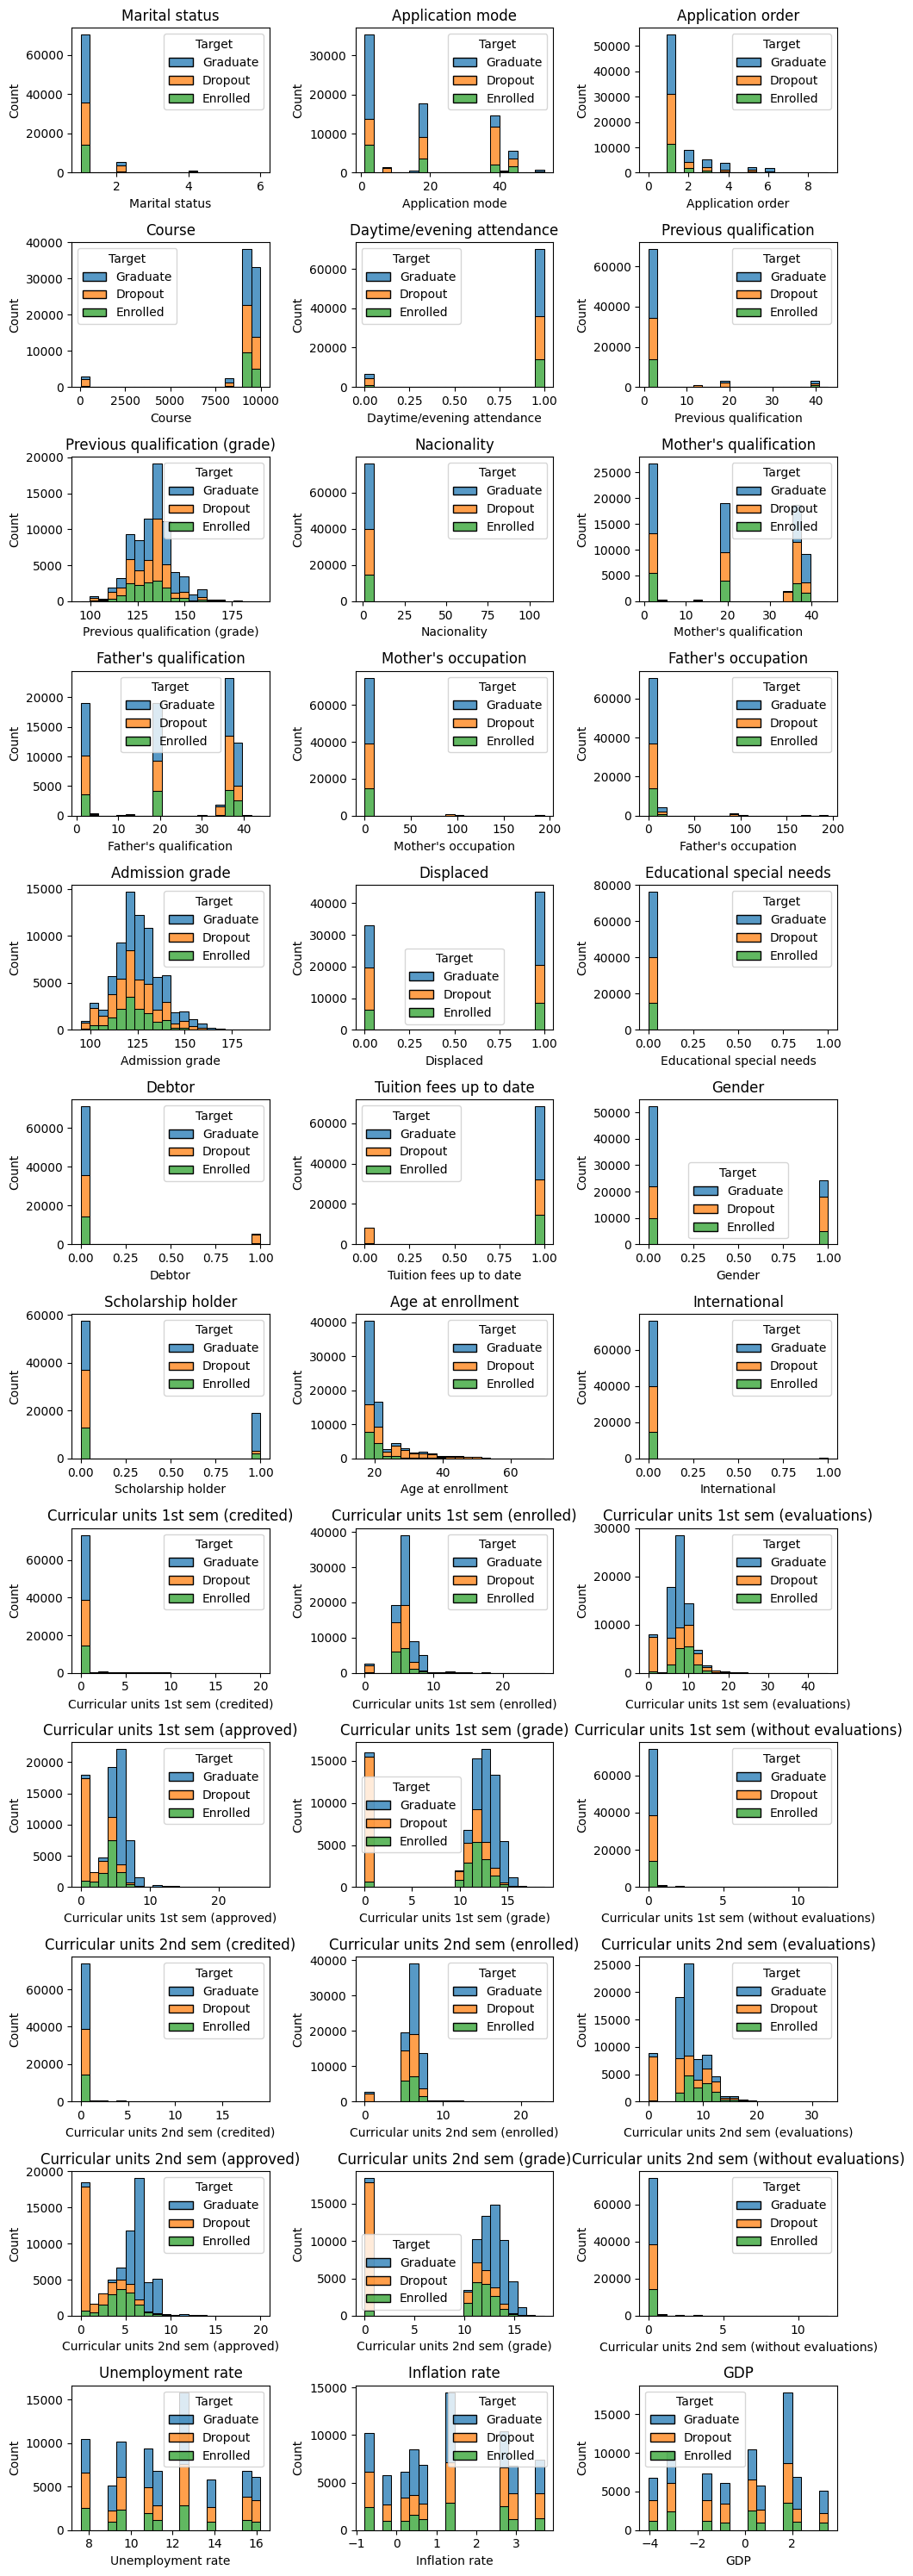

In [ ]:
df_hist = df.drop(columns=['id'])
numerical_columns = df_hist.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms with 'Target' as hue
plt.figure(figsize=(10, 30))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(12, 3, i)
    sns.histplot(data=df_hist, x=col, bins=20, edgecolor='black', hue='Target', multiple='stack')
    plt.title(col)
plt.tight_layout()
plt.show()


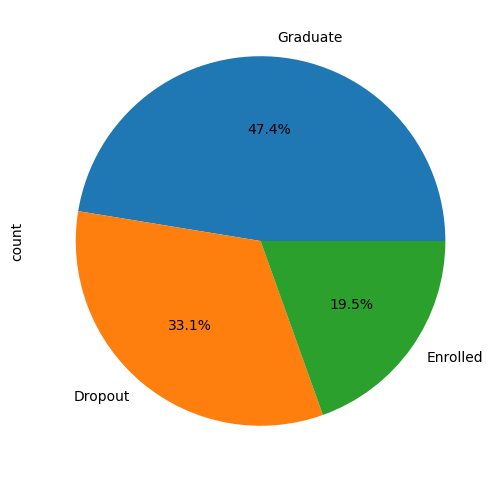

In [ ]:
df["Target"].value_counts().plot.pie(autopct='%1.1f%%');

In [5]:
# Encode the target variable to numerical for further analysis
df['Target'] = df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})

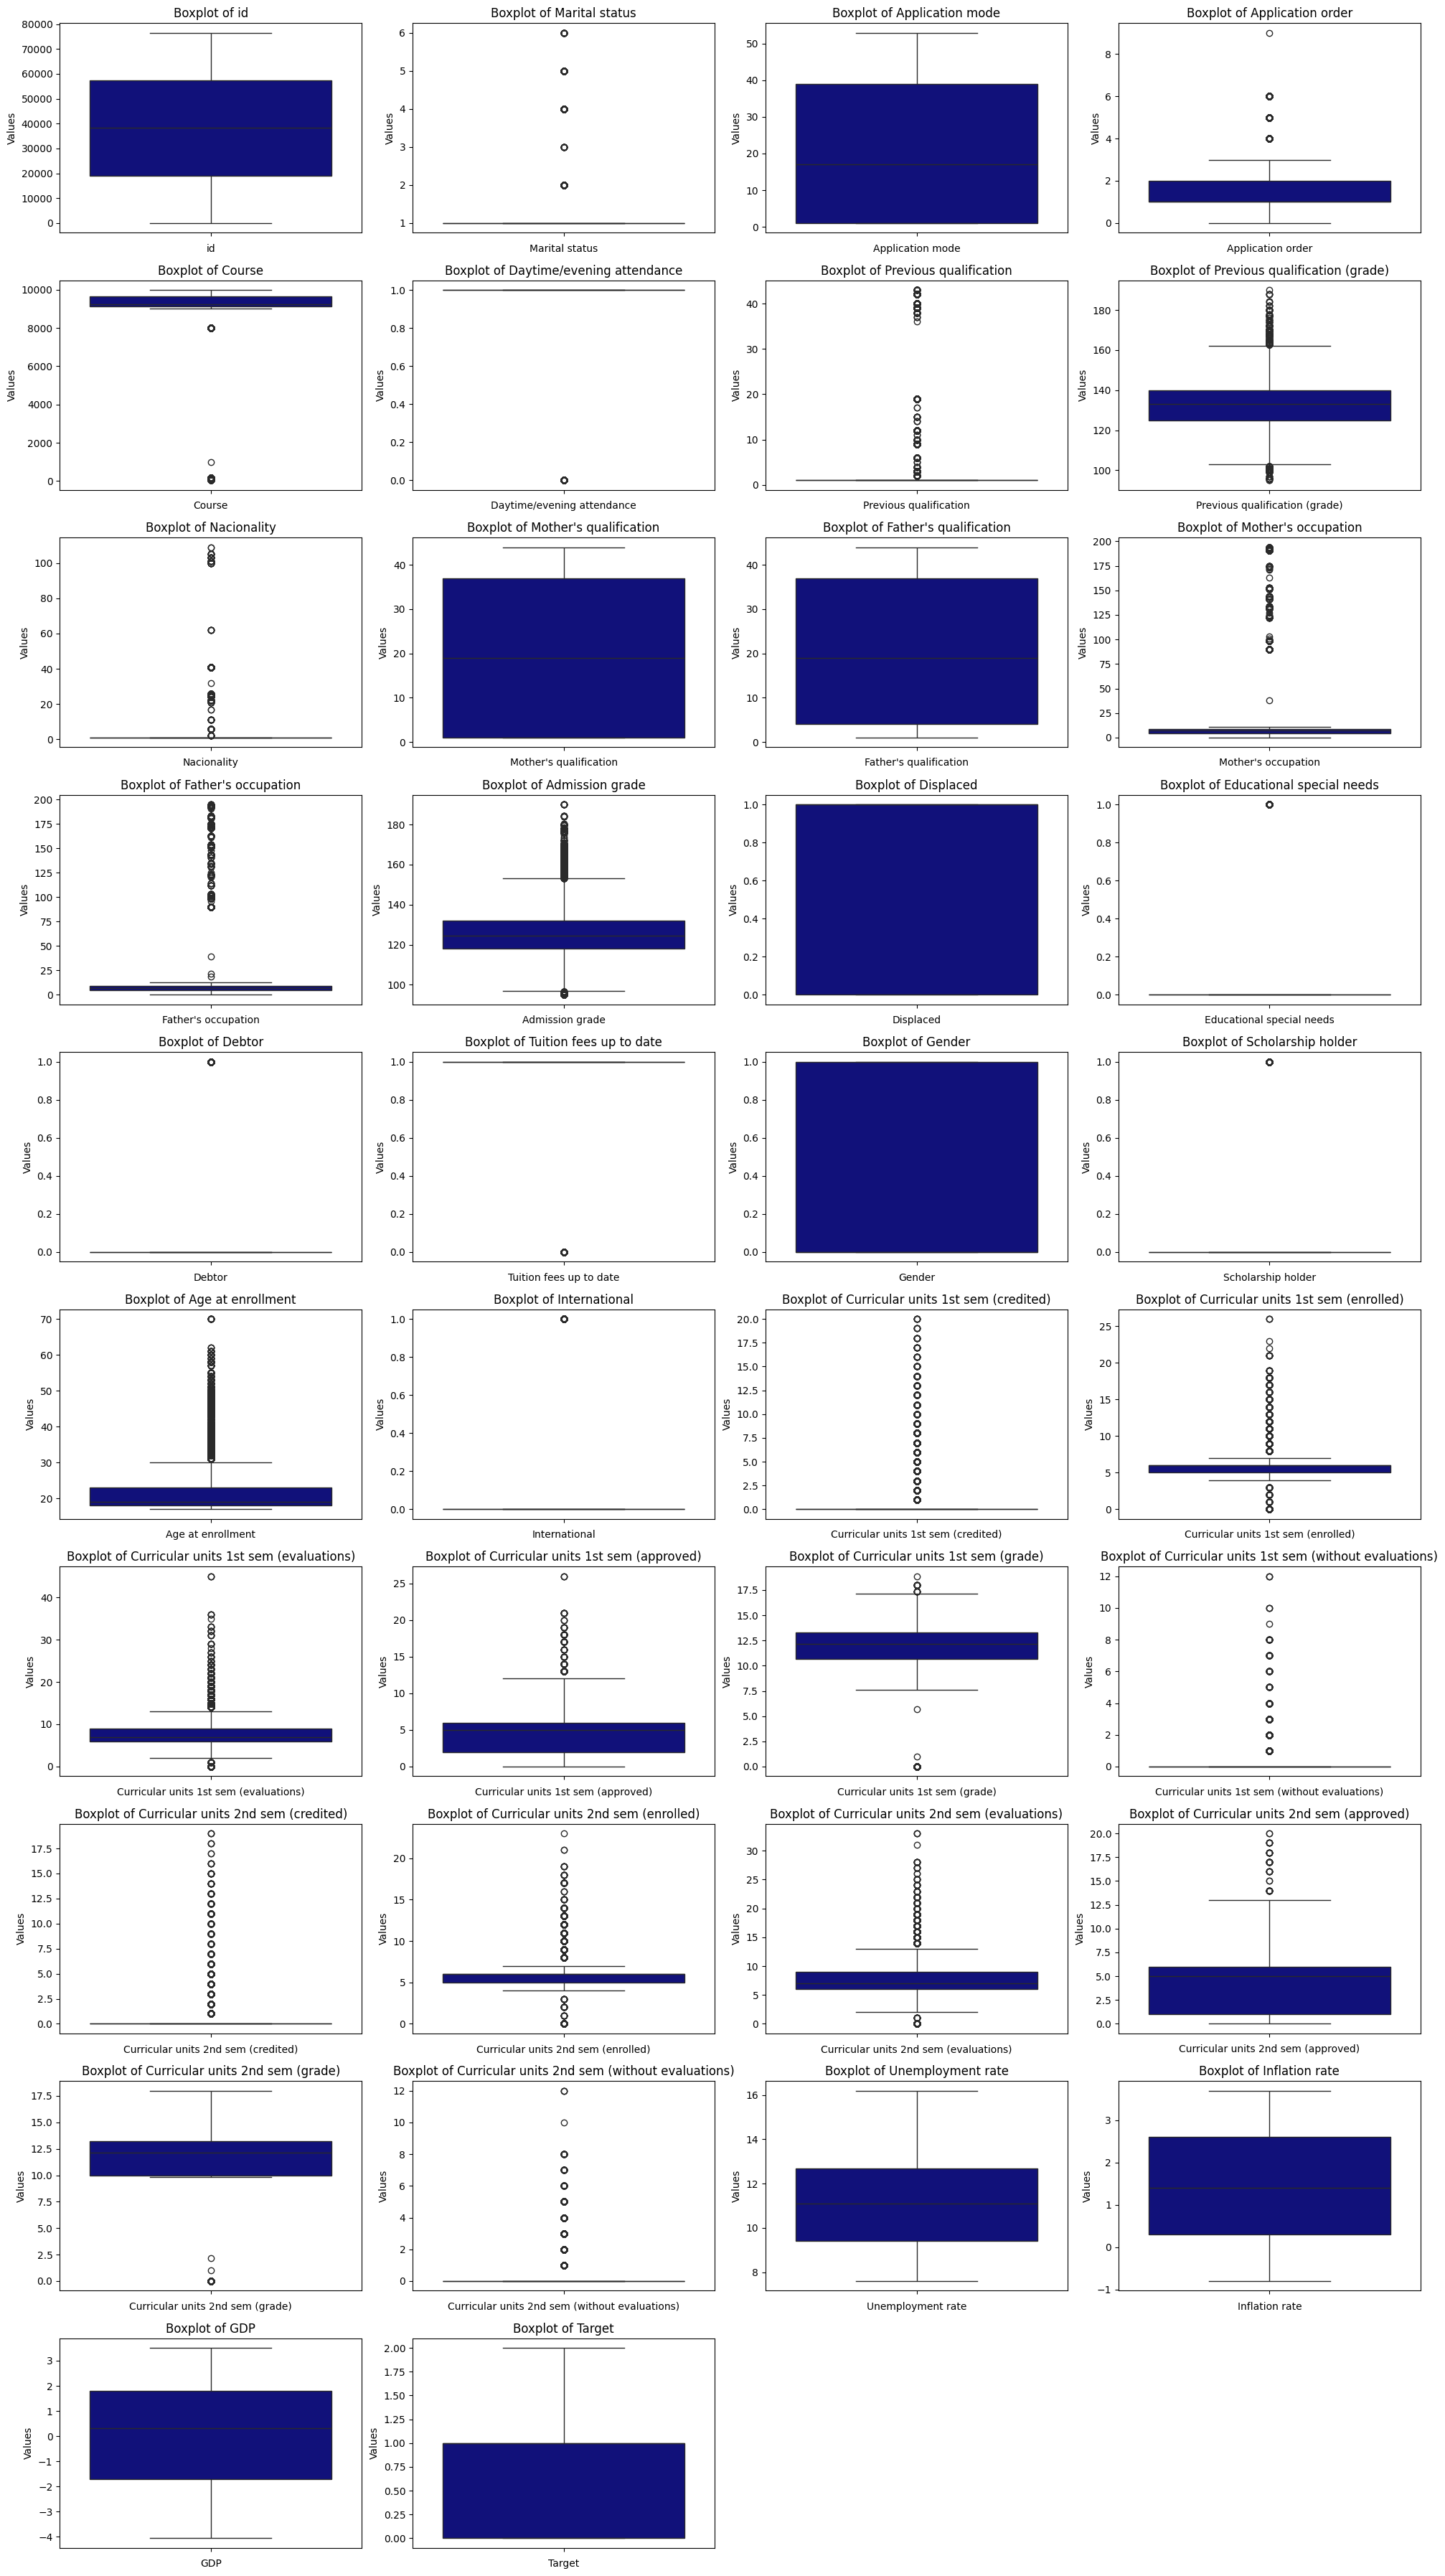

In [ ]:
plt.figure(figsize=(20, 36))


num_cols = 4
num_rows = (len(df.columns) - 1) // num_cols + 1

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[column], color='darkblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


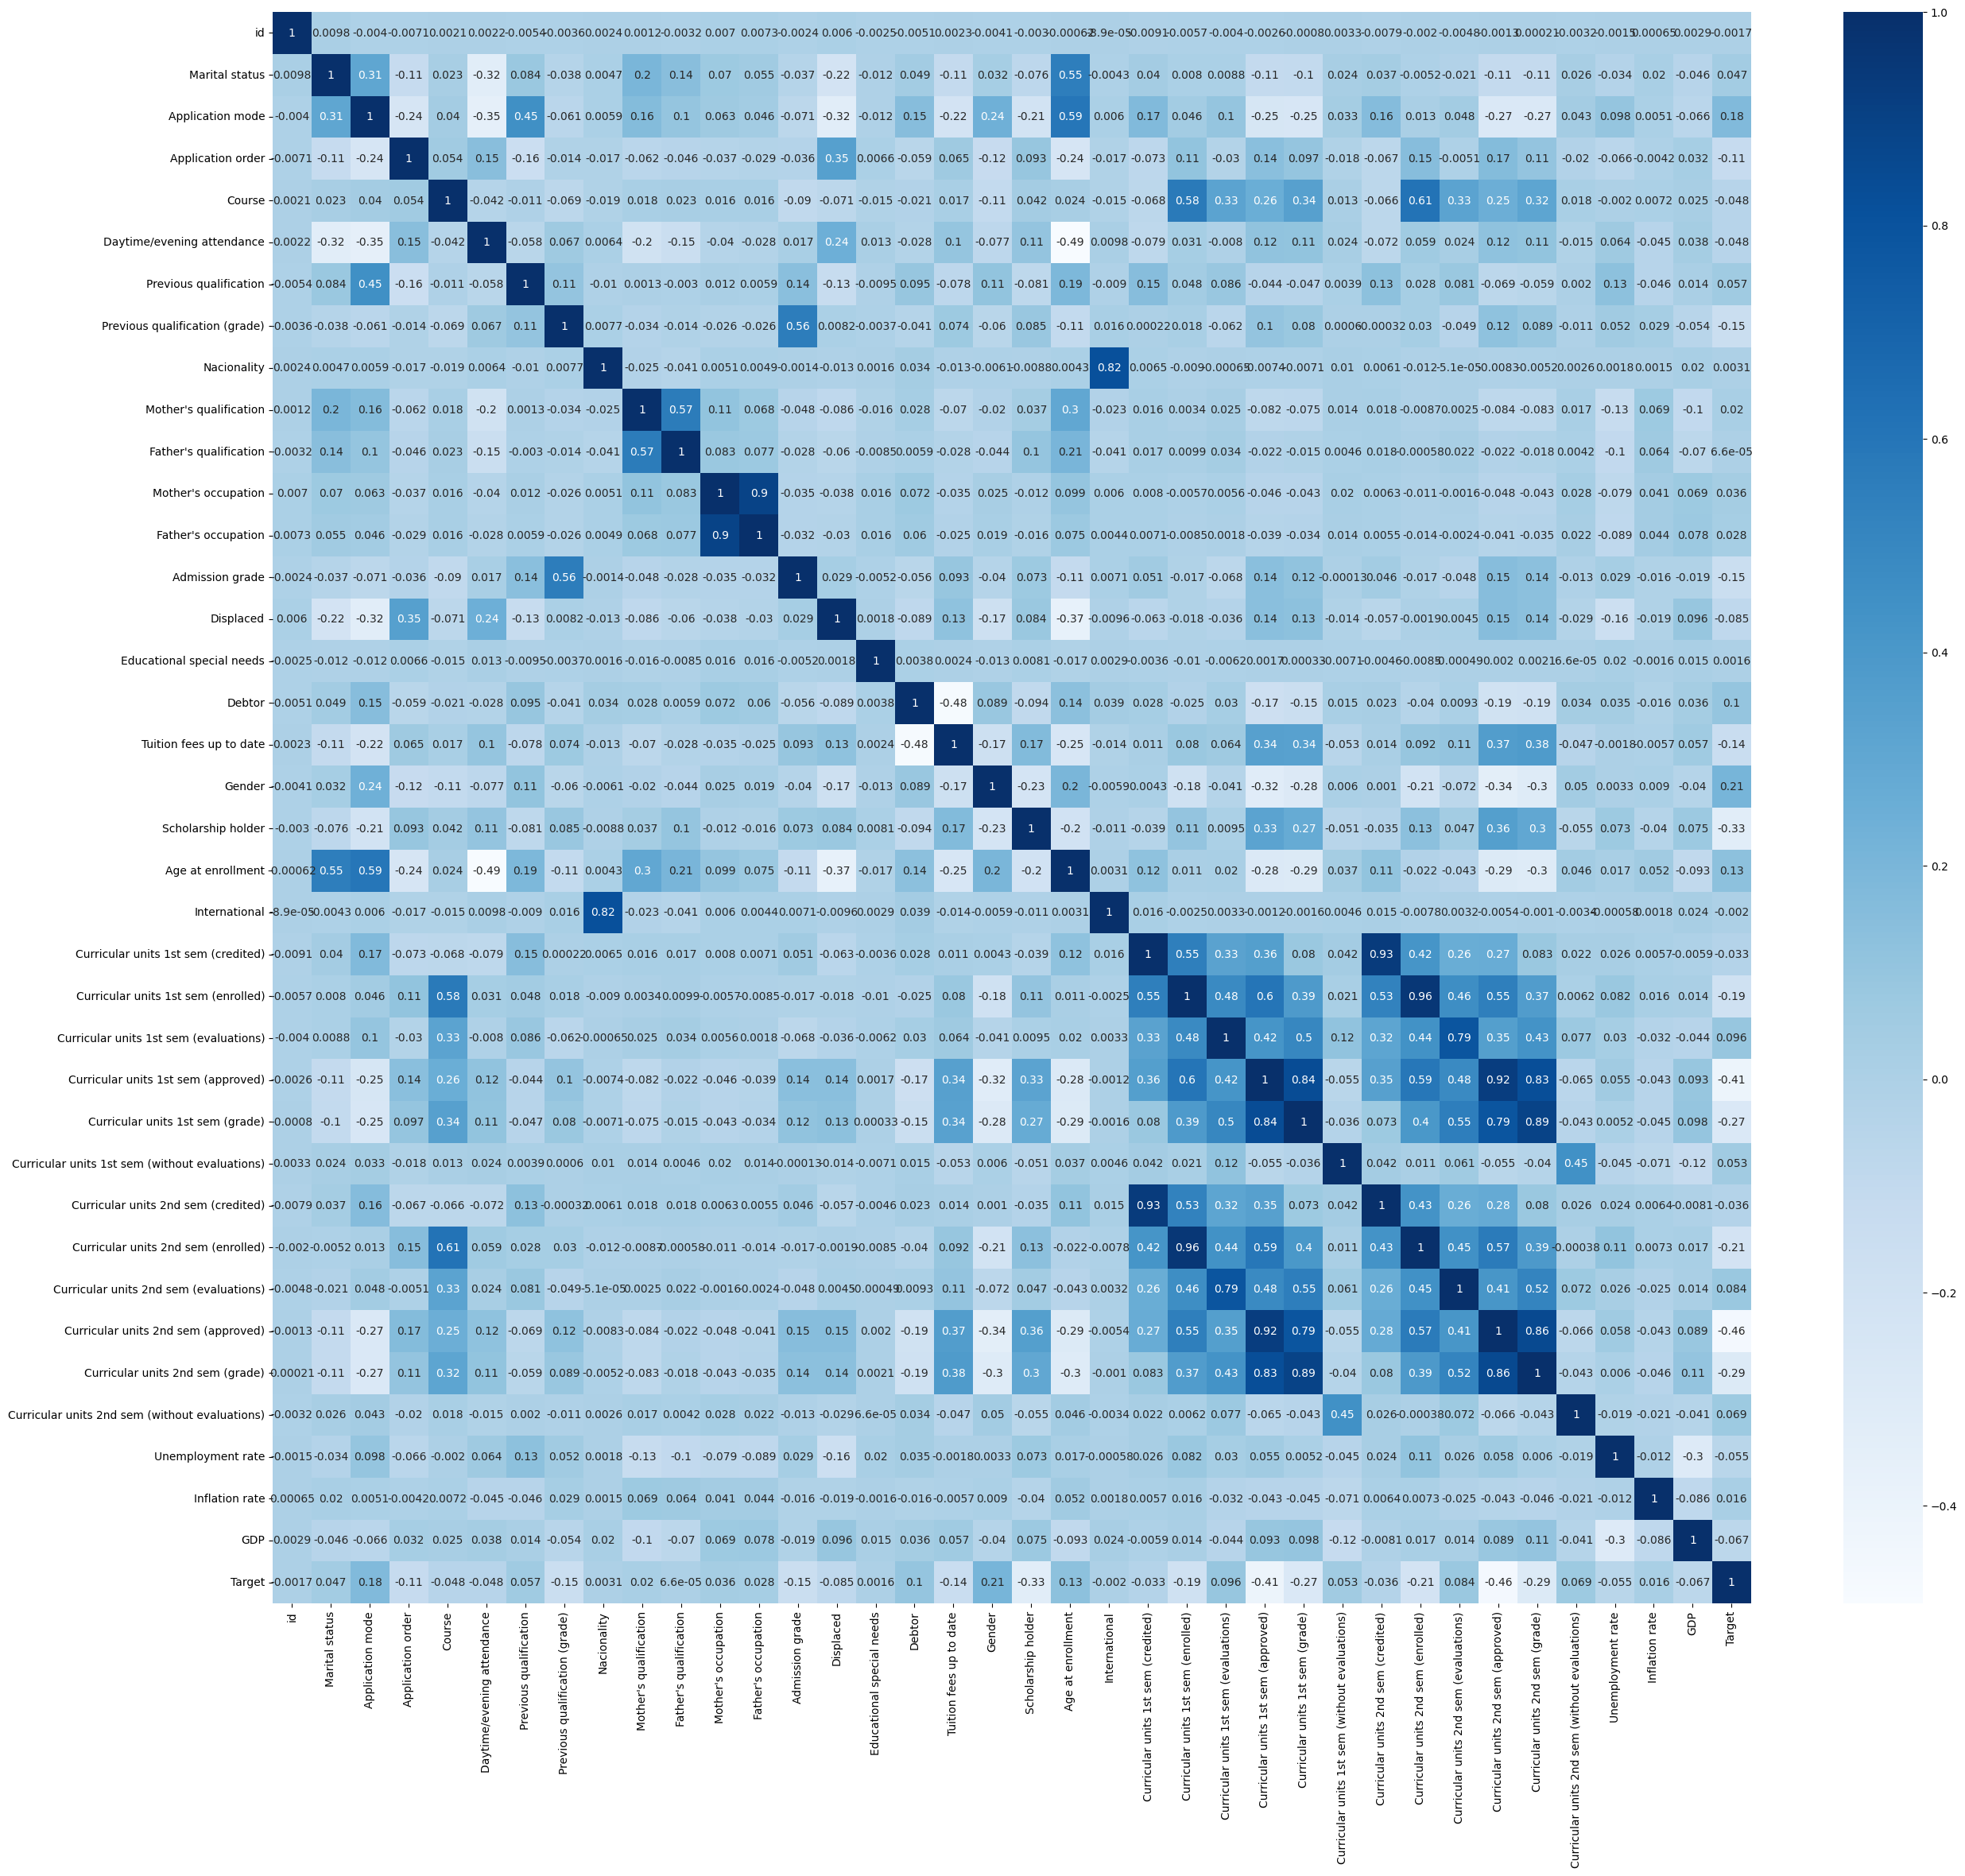

In [ ]:
# Create a correlation matrix data frame
corr_matrix = df.corr()

# Create plot
plt.figure(figsize=(30,26))

# Create an seaborn heatmap of all feature correlations
sns.heatmap(data=corr_matrix, cmap='Blues', annot=True);


### Feature Importance

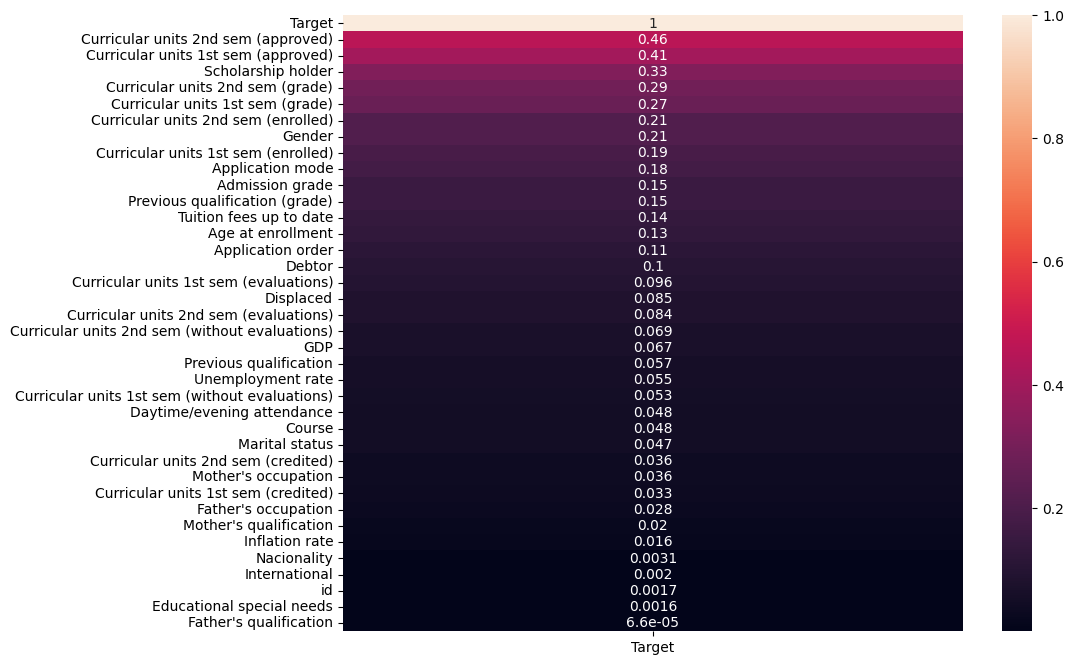

In [ ]:
corr_matrix = df.corr()['Target']
corr = corr_matrix.abs().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data =corr.to_frame(), annot=True);

# Preparing for Model

### Scaling

In [30]:
# Standard Scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Target', axis=1))


df_scaled = pd.DataFrame(scaled_features, columns=df.drop('Target', axis=1).columns)
df_scaled['Target'] = df['Target'].values

In [31]:

X = df_scaled.drop('Target', axis=1)
y = df_scaled['Target']

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

# Modelling

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', lgb.LGBMClassifier())
]

# DataFrame to store results
results = []
# Evaluate each model
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014171 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Info] Total Bins 1652

[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 37

[LightGBM] [Info] Start training from score -0.746287

[LightGBM] [Info] Start training from score -1.105333

[LightGBM] [Info] Start training from score -1.635907

                 Model  Accuracy  Precision    Recall  F1 Score

0  Logistic Regression  0.819002   0.815264  0.819002  0.815247

1        Decision Tree  0.741179   0.742119  0.741179  0.741616

2        Random Forest  0.826451   0.824217  0.826451  0.823733

3                  SVM  0.820374   0.819297  0.820374  0.816830

4          Naive Bayes  0.764114   0.755551  0.764114  0.756577

5                  KNN  0.775876   0.767268  0.775876  0.766350

6              XGBoost

# LightGBM

In [33]:
# LGBMClassifier
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)


# Hiperparameter
param_grid = {
    'num_leaves': [256],
    'max_depth': [6],
    'learning_rate': [0.01],
    'n_estimators': [1000]
}



In [35]:
# GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [36]:
# GridSearchCV
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.420013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1648
[LightGBM] [Info] Number of data points in the train set: 55093, number of used features: 37
[LightGBM] [Info] Start training from score -0.746398
[LightGBM] [Info] Start training from score -1.106009
[LightGBM] [Info] Start training from score -1.634489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [6],
                         'n_estimators': [1000], 'num_leaves': [256]},
             scoring='accuracy', verbose=1)

In [38]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [39]:
# Accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(grid_search.best_params_)

Accuracy: 0.8311552535284893
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'num_leaves': 256}


In [17]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [40]:
eval_metric(best_model, X_train, y_train, X_test, y_test)

Test_Set
[[3361   51  222]
 [ 159 2068  283]
 [ 412  165  931]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3634
           1       0.91      0.82      0.86      2510
           2       0.65      0.62      0.63      1508

    accuracy                           0.83      7652
   macro avg       0.80      0.79      0.79      7652
weighted avg       0.83      0.83      0.83      7652


Train_Set
[[30544   390  1714]
 [ 1379 19323  2084]
 [ 3259  1167  9006]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     32648
           1       0.93      0.85      0.89     22786
           2       0.70      0.67      0.69     13432

    accuracy                           0.85     68866
   macro avg       0.83      0.82      0.82     68866
weighted avg       0.85      0.85      0.85     68866



# Submission

In [41]:
test_scaled = scaler.transform(test)

# Model ile tahmin yapma
predictions = best_model.predict(test_scaled)

In [42]:


label_map = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}
predicted_labels = [label_map[pred] for pred in predictions]

# Creating the output DataFrame
output = pd.DataFrame({'id': test['id'], 'Target': predicted_labels})





In [44]:
output.to_csv('lgbm_model_sub.csv', index=False)

In [43]:
output["Target"].value_counts()

Target
Graduate    26541
Dropout     15246
Enrolled     9225
Name: count, dtype: int64